### Import Libraries

In [2]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.ensemble import RandomForestClassifier    # For the random forest model
from sklearn.metrics import accuracy_score              # To evaluate model performance
import pickle                   # For saving and loading models
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

### Load Data

In [3]:
# Load the data
path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

pd.options.display.max_columns = None
# print(data.columns)
# print(data.dtypes)

print(data['MonthlyIncome'].min())
print(data['MonthlyIncome'].max())

0
22405


<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_2264\812858796.py:2: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'


In [4]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

# Oversampling the minority class
print(Counter(y))
over = RandomOverSampler(random_state=42) # Create an instance of SMOTE
X, y = over.fit_resample(X, y)
print(Counter(y))

Counter({0: 3590, 1: 1069})
Counter({1: 3590, 0: 3590})


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save the fitted scaler and column order
with open('D:\\BIM\\Summer Project\\project\\models\\encoders.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,             # Save the fitted StandardScaler
        'columns': X.columns.tolist() # Save column order
    }, f)

(5385, 33) (1795, 33) (5385,) (1795,)


In [6]:
# Create and train the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


Model accuracy: 0.94

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       873
           1       0.93      0.95      0.94       922

    accuracy                           0.94      1795
   macro avg       0.94      0.94      0.94      1795
weighted avg       0.94      0.94      0.94      1795



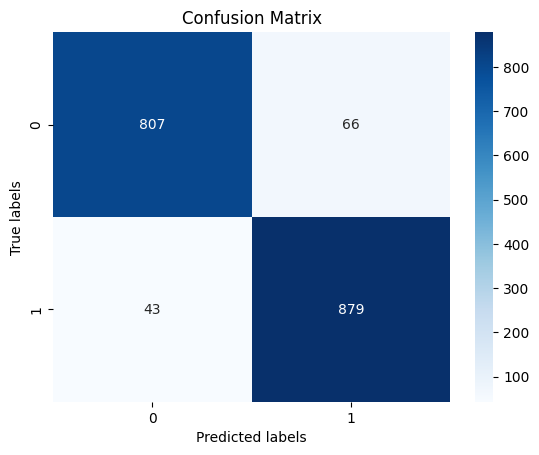

In [7]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as a PNG file BEFORE plt.show()
plt.savefig('D:\\BIM\\Summer Project\\project\\models\\confusion_matrix.png')

plt.show()

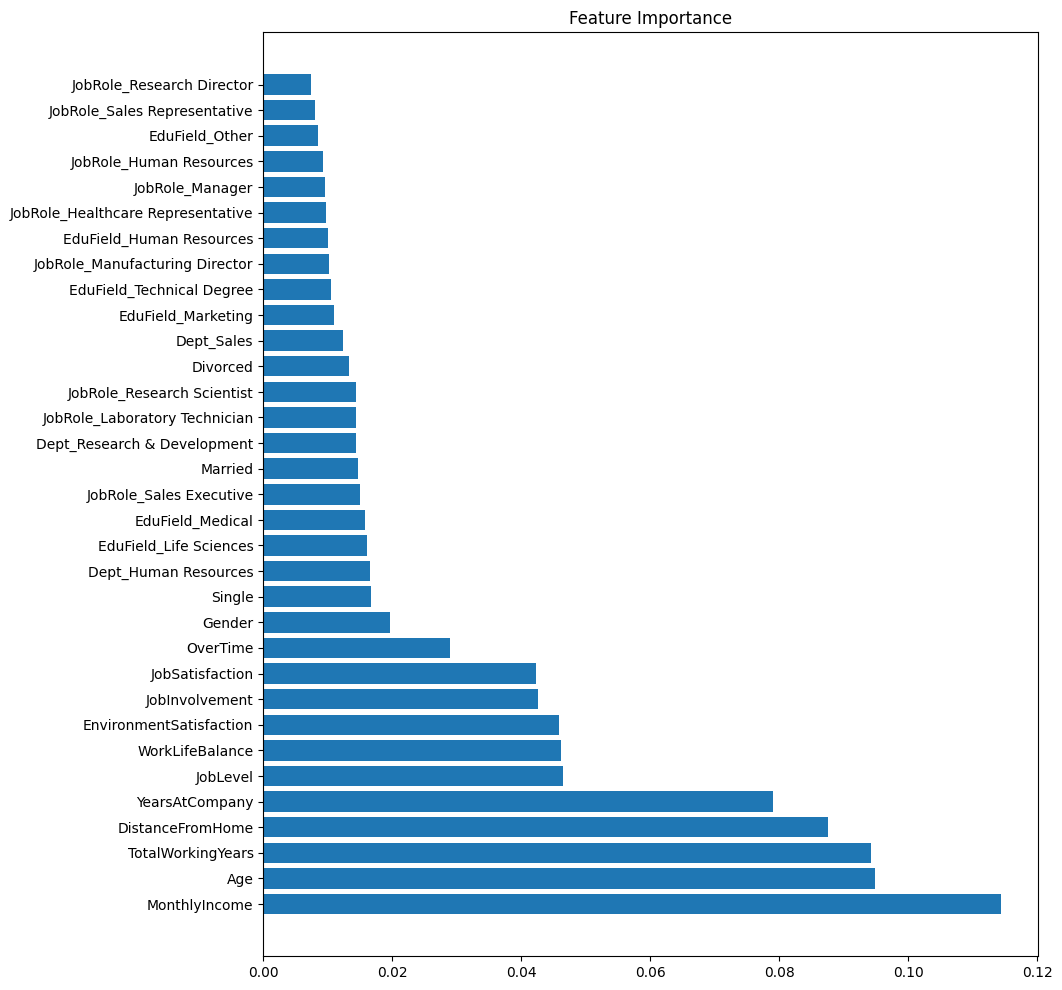

In [8]:
features = X.columns
importance = model.feature_importances_
indices =np.argsort(importance)[::-1]
names = [features[i] for i in indices]

# print("Feature ranking:")
# for i in range(X.shape[1]):
#     print(f"{i + 1}. {names[i]} ({importance[indices[i]]})")

plt.figure(figsize=(10, 12))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), labels=names)
plt.show()

### Visualize Attrition Across Multiple Metrics
We will visualize attrition counts across several features, including one-hot encoded columns.

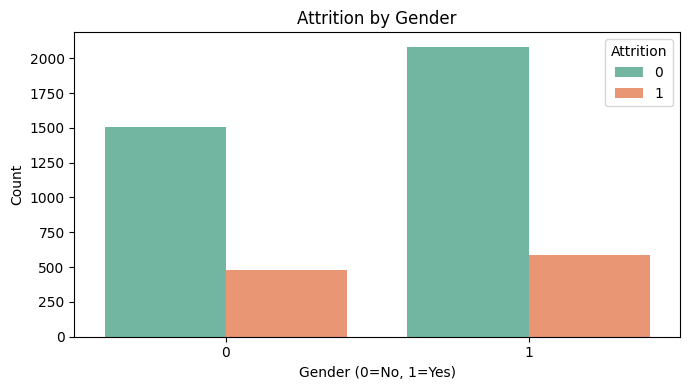

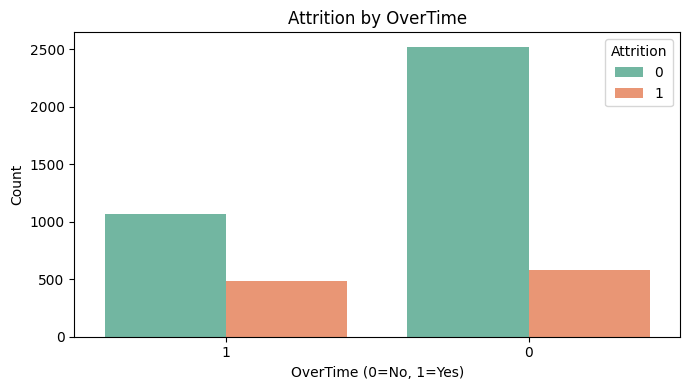

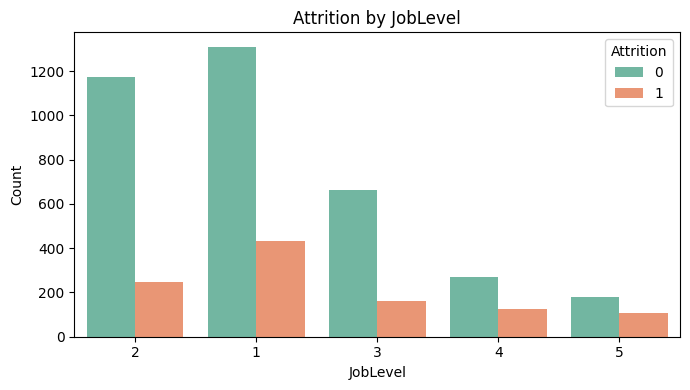

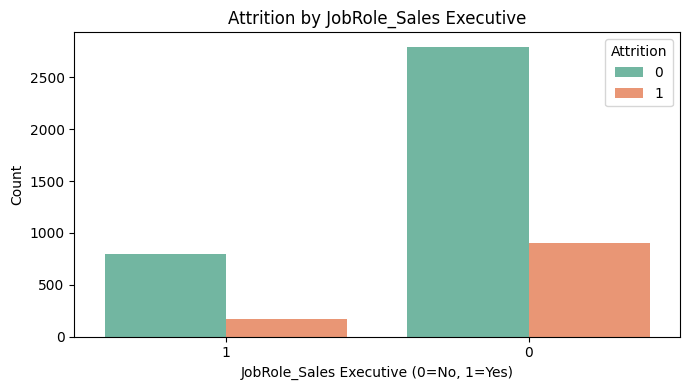

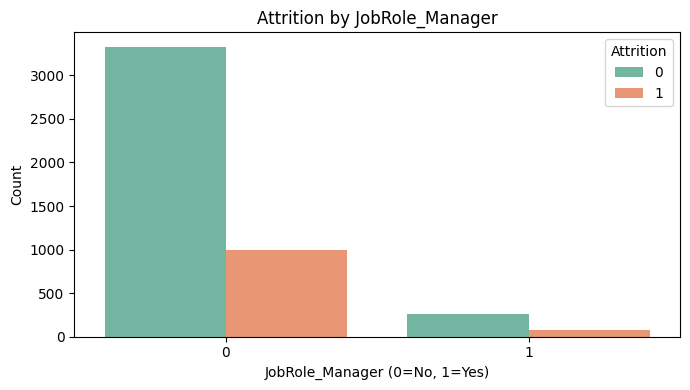

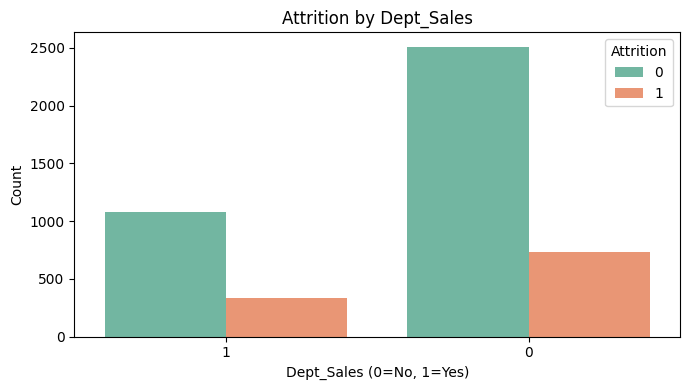

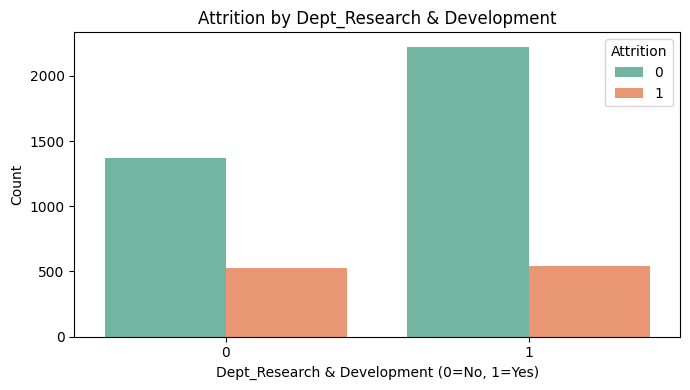

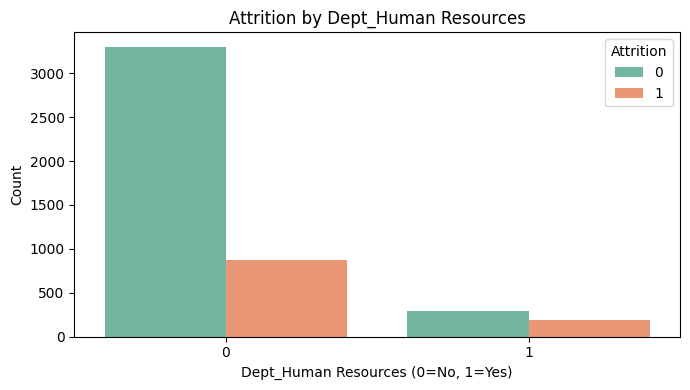

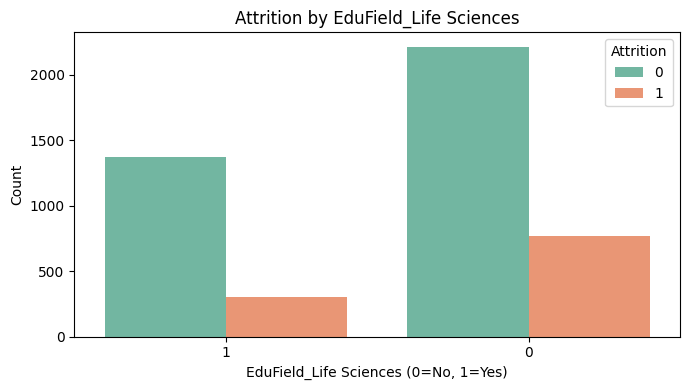

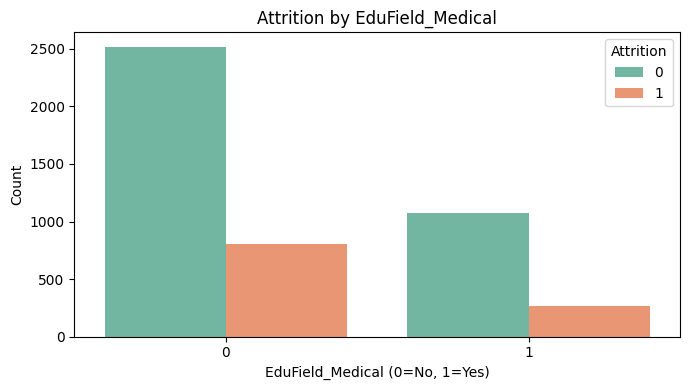

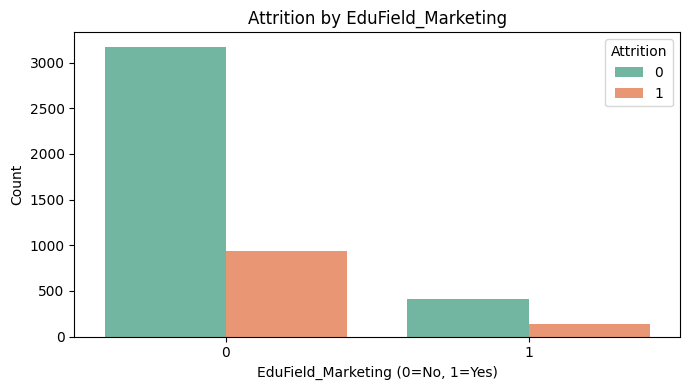

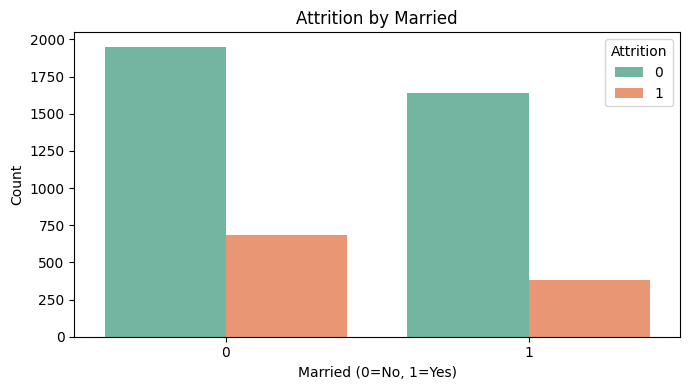

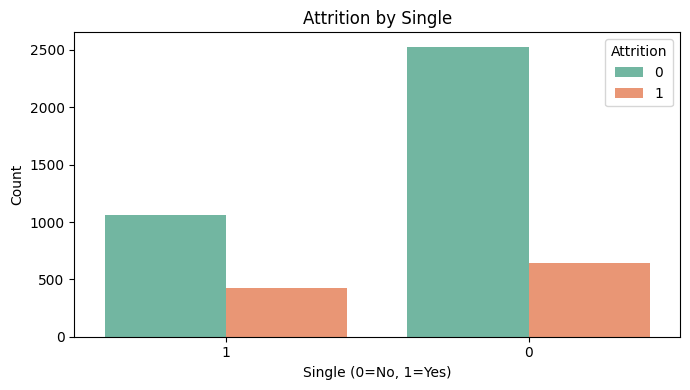

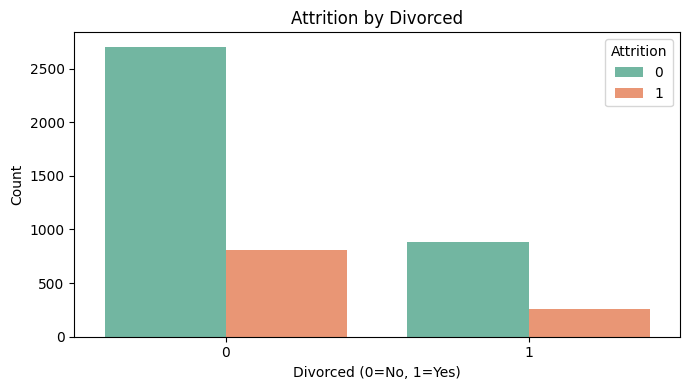

ValueError: Could not interpret value `AgeGroup` for `x`. An entry with this name does not appear in `data`.

<Figure size 700x400 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of metrics to visualize (including some one-hot encoded columns)
metrics = [
    'Gender', 'OverTime', 'JobLevel', 'JobRole_Sales Executive', 'JobRole_Manager',
    'Dept_Sales', 'Dept_Research & Development', 'Dept_Human Resources',
    'EduField_Life Sciences', 'EduField_Medical', 'EduField_Marketing',
    'Married', 'Single', 'Divorced', 'AgeGroup'
]

for metric in metrics:
    plt.figure(figsize=(7, 4))
    if metric in data.columns and str(data[metric].dtype) in ['int64', 'int32', 'float64']:
        # For one-hot columns, show as categorical (0/1)
        sns.countplot(x=data[metric].astype(str), hue=data['Attrition'], palette='Set2')
        plt.xlabel(metric + " (0=No, 1=Yes)" if set(data[metric].unique()) <= {0,1} else metric)
    else:
        sns.countplot(x=metric, hue='Attrition', data=data, palette='Set2')
        plt.xlabel(metric)
    plt.title(f'Attrition by {metric}')
    plt.ylabel('Count')
    plt.legend(title='Attrition', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
# # Save the model
# import pickle

# model_path = 'D:\\BIM\\Summer Project\\project\\models\\random-forest-model.pkl'
# with open(model_path, 'wb') as file:
#     # pickle.dump((model, X.columns.tolist()), file)